# Network-Based Model Building for Discrete Location Allocation in Python: Integrating PySAL and Gurobi

------


### James D. Gaboardi,  David C. Folch

------

### Florida State University,  Department of Geography

---------------

## Python 2.7
## https://www.python.org

-------------------

## PySAL 1.11.0dev
## Python Spatial Analysis Library
## https://www.pysal.readthedocs.org

------------------------

## Gurobi 6.5
## GurobiPy
## http://www.gurobi.com

-------------------

## 1. <u>Optimization in GIS & the Current State</u>
## 2. <u>Demonstration of PySAL + Gurobi</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; • <u>Imports</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; •  <u>Data Preparation & Creation</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; •  <u>Mathematical Optimization</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; •  <u>Set Cover Location Problem</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; •  <u><i>p</i>-Median Problem</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; •  <u><i>p</i>-Center Problem</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; •  <u><i>p</i>-Center Problem (Manual LP Creation)</u>
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; •  <u>Visualization of Selected Locations</u>
## 3. <u>Next Steps</u>

-------------------

## <u>Imports & Specs</u>

In [1]:
import datetime as dt
import IPython.display as IPd
import os
import platform
from prettytable import from_csv
import sys
import time

path = '/Users/jgaboardi/NARSC__15/'

# 1.&nbsp;&nbsp;&nbsp;&nbsp; <u>Optimization & GIS: Current State</u>

## <u>Open Source Software Options</u>

In [2]:
# Table of Open-Source software for optimization
OpenOpt = open(path+'NARSC__Optimizers__Open.csv', "r")
OpenTable = from_csv(OpenOpt)
print OpenTable
OpenOpt.close()

+------------------+------------------------+--------------+--------------------------------+
|   Open Source    |          Type          | last updated |             Notes              |
+------------------+------------------------+--------------+--------------------------------+
|     COIN-OR      | Open Source Initiative |              |   many resources associated    |
| CoinGraphClasses |        Library         |              |   network algorithms (COIN)    |
|       CMPL       |        Language        |              |             (COIN)             |
|      CoinMP      |   Interface Library    |              |      supports CLP-CBC-CGL      |
|       CLP        |       LP Solver        |              |         Coin LP (COIN)         |
|       CBC        |      MILP Solver       |              |   Coin Branch-and-Cut (COIN)   |
|       CGL        |        Library         |              | Cut Generation Library (COIN)  |
|     Symphony     |  MILP Solver/Library   |  10/10/2015  |

## <u>Proprietary Software Options</u>

In [3]:
# Table of Proprietary software for optimization
PropOpt = open(path+'NARSC__Optimizers__Proprietary.csv', "r")
PropTable = from_csv(PropOpt)
print PropTable
PropOpt.close()

+--------------------------+-------------------+--------------------------------+
|       Proprietary        |        Type       |             Notes              |
+--------------------------+-------------------+--------------------------------+
|           AMPL           |   Solver/Modeler  |      30-day student trial      |
|          ArcGIS          |        GIS        |      Network Analyst Tool      |
|          CPLEX           |       Solver      |     free academic license      |
|          Gurobi          |       Solver      |     free academic license      |
| IMSL Numerical Libraries |     Libraries     |                                |
|          Kimeme          |       Solver      |        multi-objective         |
|          Lingo           |       Solver      |                                |
|          Maple           |       Solver      |                                |
|          MATLAB          |       Solver      |      Optimization Toolbox      |
|          MOSEK

## <u>Potential for error</u>

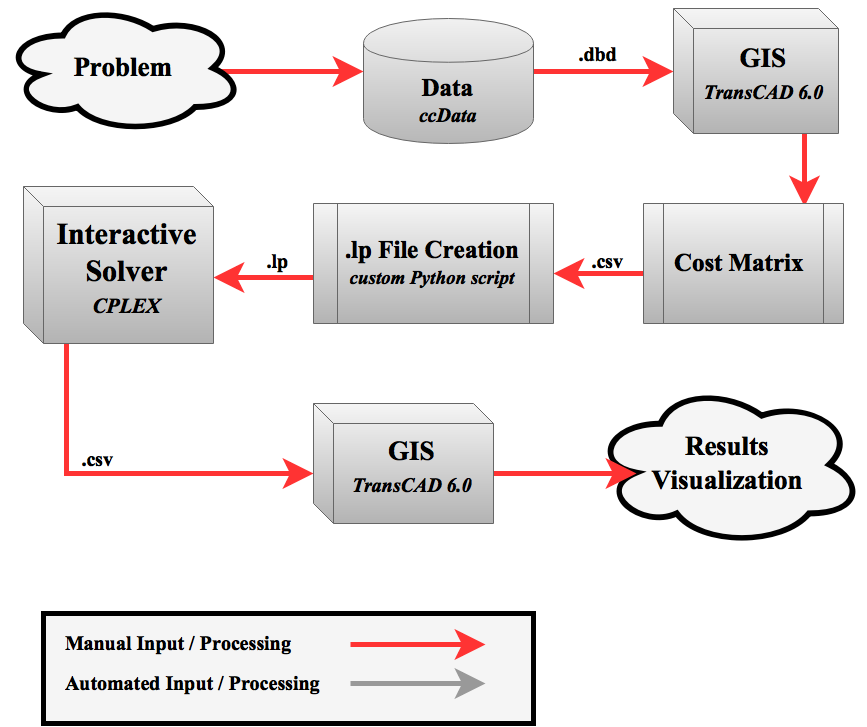

In [4]:
# Manual Conceptual Model
My_Manual = IPd.Image(path+'/Manual_Diagram.png')
My_Manual

-------------------

# 2. &nbsp;&nbsp;&nbsp;&nbsp;<u>Demonstration</u>

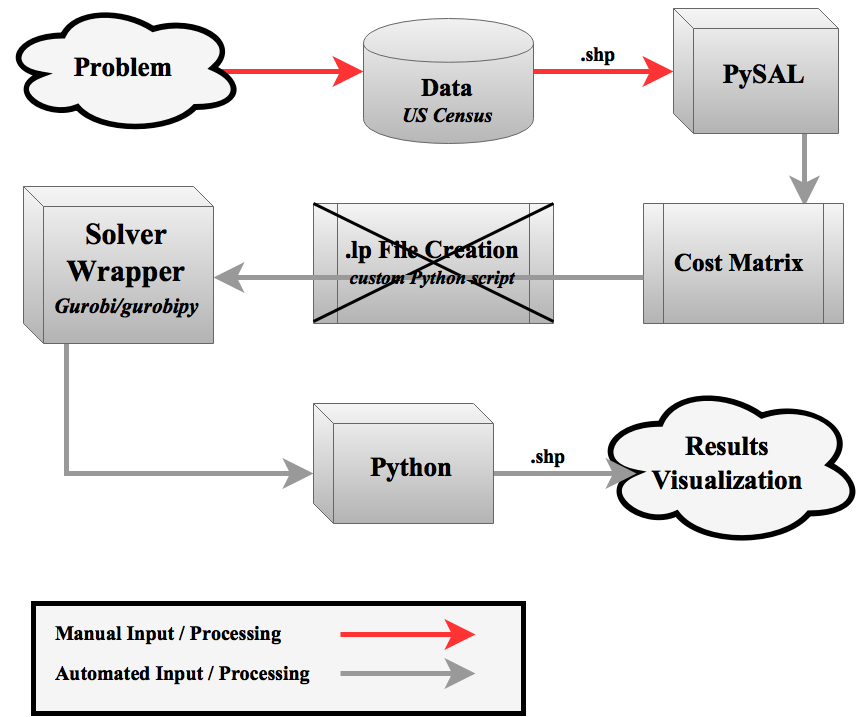

In [5]:
# Automated Conceptual Model
My_Auto = IPd.Image(path+'/Auto_Diagram.png')
My_Auto

## <u>Imports & Specs</u>

In [22]:
from collections import OrderedDict
import geopandas as gpd
import gurobipy as gbp
import networkx as nx
import numpy as np
import pysal as ps
from shapely.geometry import Point
import shapefile as shp
%pylab inline

print '********************************************************'
print ' | Platform Specs:                                    |'
print ' |  | OS X v', platform.mac_ver()[0],'                                 |'
print ' |  | Processor: ', platform.processor(), '                               |'
print ' |  | Machine: ', platform.machine(), '                               |'
print ' |  | Python: ', platform.python_version(), '                                 |'
print ' |  | PySAL: ', ps.version, '                              |'
print ' |  | Gurobi: ', gbp.gurobi.version(),'                             |'
print '********************************************************'
print ' |  | Date/Time --------- ', dt.datetime.now(), '|'
print '********************************************************'

Populating the interactive namespace from numpy and matplotlib
********************************************************
 | Platform Specs:                                    |
 |  | OS X v 10.11.1                                  |
 |  | Processor:  i386                                |
 |  | Machine:  x86_64                                |
 |  | Python:  2.7.9                                  |
 |  | PySAL:  1.11.0dev                               |
 |  | Gurobi:  (6, 5, 0)                              |
********************************************************
 |  | Date/Time ---------  2015-11-08 18:23:34.375194 |
********************************************************


`%matplotlib` prevents importing * from pylab and numpy


## <u>PySAL</u>

In [23]:
print 'PySAL'
print dir(ps)
print '\nPySAL.Network'
print dir(ps.Network)

PySAL
['Box_Plot', 'DistanceBand', 'Equal_Interval', 'Fisher_Jenks', 'G', 'G_Local', 'Gamma', 'Geary', 'IOHandlers', 'Jenks_Caspall', 'Jenks_Caspall_Forced', 'Jenks_Caspall_Sampled', 'Join_Counts', 'K_classifiers', 'Kernel', 'LISA_Markov', 'MISSINGVALUE', 'Markov', 'Max_P_Classifier', 'Maximum_Breaks', 'Maxp', 'Maxp_LISA', 'Moran', 'Moran_BV', 'Moran_BV_matrix', 'Moran_Local', 'Natural_Breaks', 'Network', 'NetworkF', 'NetworkG', 'NetworkK', 'Percentiles', 'Quantiles', 'SpatialTau', 'Spatial_Markov', 'Std_Mean', 'Tau', 'Theil', 'TheilD', 'TheilDSim', 'Theta', 'User_Defined', 'W', 'WSP', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', 'adaptive_kernelW', 'adaptive_kernelW_from_shapefile', 'base_path', 'bin', 'bin1d', 'binC', 'block_weights', 'buildContiguity', 'build_lattice_shapefile', 'cg', 'check_version', 'comb', 'common', 'config', 'config_path', 'core', 'datetime', 'directional', 'ergodic', 'esda', 'examples', 'full', 'gadf', 'hexLat2W', 'higher_order'

-----------------

## 2.1 &nbsp;&nbsp;&nbsp;&nbsp;<u>Data preparation and creation</u>

### 2.1.1 &nbsp;&nbsp;&nbsp;&nbsp;<u>Instantiate a network</u>

In [24]:
# Instanitate network of Waverly Hills
ntw = ps.Network(path+'Waverly/Waverly.shp')

### 2.1.2 &nbsp;&nbsp;&nbsp;&nbsp;<u>Instantiate all graphs to be drawn</u>

In [25]:
# Roads and Nodes
g = nx.Graph()

# Graph of Roads and Nodes
g1 = nx.MultiGraph()

# Clients
GRAPH_client = nx.Graph()
#GRAPH_client_New = nx.Graph()

# Snapped Clients
g_client = nx.Graph()

# Service
GRAPH_service = nx.Graph()

# Snapped Service
g_service = nx.Graph()

## Optimized Locations
# Set Cover
setcover_g = nx.Graph()

# p-Median
median_g = nx.Graph()

# p-Center
center_g = nx.Graph()

# p-Center Manual
center_g_man = nx.Graph()

### 2.1.3 &nbsp;&nbsp;&nbsp;&nbsp;<u>Create Bounding Box from the roads in 'Waverly.shp'</u>

In [26]:
#shp_W = pd
shp_W = ps.open(path+'Waverly/Waverly.shp')

# create new bounding box...

shp_W.bbox

[-84.280694, 30.450132999999997, -84.24955399999999, 30.507330999999997]

In [11]:
print dir(ntw)

['NetworkF', 'NetworkG', 'NetworkK', '__doc__', '__init__', '__module__', '_extractnetwork', '_newpoint_coords', '_round_sig', '_snap_to_edge', '_yieldneighbor', 'adjacencylist', 'allneighbordistances', 'compute_distance_to_nodes', 'contiguityweights', 'count_per_edge', 'distancebandweights', 'edge_lengths', 'edge_to_graph', 'edges', 'enum_links_node', 'extractgraph', 'graph_lengths', 'graph_to_edges', 'graphedges', 'in_shp', 'loadnetwork', 'nearestneighbordistances', 'node_coords', 'node_distance_matrix', 'node_list', 'node_sig', 'nodes', 'pointpatterns', 'savenetwork', 'segment_edges', 'simulate_observations', 'snapobservations', 'unique_segs']


### 2.1.4 &nbsp;&nbsp;&nbsp;&nbsp;<u>Create numpy arrays of random floats within a  bounding box</u>

In [12]:
# Client latitude
lat_client = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 100)

# Client longitude
lon_client = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 100)

# Service latitude
lat_service = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 15)

# Service longitude
lon_service = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 15)

### 2.1.5 &nbsp;&nbsp;&nbsp;&nbsp;<u>Zip the latitude and longitude lists together</u>

In [13]:
# Client lat/lon coordinates
rand_coords_client = map(list, zip(lat_client, lon_client))

# Service lat/lon coordinates
rand_coords_service = map(list, zip(lat_service, lon_service))

### 2.1.6 &nbsp;&nbsp;&nbsp;&nbsp;<u>Create Empty Random Points Dictionaries</u>

In [14]:
# Empty Clients dictionary
points_client = {}

# Empty Service dictionary
points_service = {}

### 2.1.7 &nbsp;&nbsp;&nbsp;&nbsp;<u>Fill dictionaries of random roints</u>

In [15]:
# CLIENT with {id: [lon, lat], } format
for idx, coords in enumerate(rand_coords_client):
    GRAPH_client.add_node(idx)
    points_client[idx] = coords
    GRAPH_client.node[idx] = coords

# SERVICE with {id: [lon, lat], } format  
for idx, coords in enumerate(rand_coords_service):
    GRAPH_service.add_node(idx)
    points_service[idx] = coords
    GRAPH_service.node[idx] = coords

### 2.1.8 &nbsp;&nbsp;&nbsp;&nbsp;<u>Draw roads, simplified network, and random client & service nodes</u>

2015-11-08 17:52:41.666974


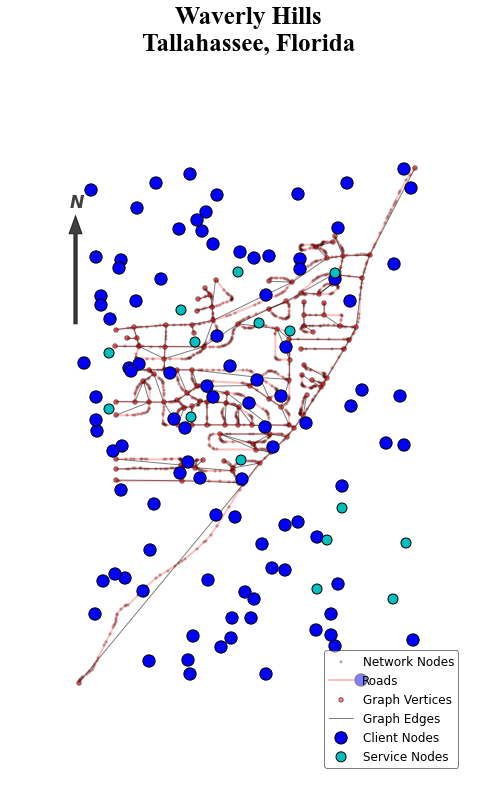

In [16]:
print dt.datetime.now()

#Instantiate Figure
figsize(6,10)

#Draw Graph of Actual Nodes and Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

#Draw only unique edges in graph
for e in ntw.graphedges:
    g1.add_edge(*e)
    # highlights cases where start and end node are the same
    if e[0]==e[1]:
        g1.add_node(e[0])
for node_id in g1.node:
    g1.node[node_id] = ntw.node_coords[node_id]
nx.draw(g1, ntw.node_coords, node_size=20, alpha=0.5)

# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
        node_size=150, alpha=1, node_color='b')

# Draw Graph of Random Service Points
nx.draw(GRAPH_service, points_service, 
    node_size=100, alpha=1, node_color='c')

# Legend (Ordered Dictionary) from collections
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Graph Vertices']=g1
LEGEND['Graph Edges']=g1
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, 
       loc='lower right', 
       fancybox=True, 
       framealpha=0.5,
       scatterpoints=1)

# Title
title('Waverly Hills\nTallahassee, Florida', family='Times New Roman', 
      size=25, color='k', backgroundcolor='w', weight='bold')
'''
# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)
'''

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.49, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.503), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

### 2.1.9 &nbsp;&nbsp;&nbsp;&nbsp;<u>Create weights at nodes and sum</u>

In [ ]:
# Client Weights for demand
Ai = np.random.randint(5, 50, len(rand_coords_client))
Ai = Ai.reshape(len(Ai),1)

# Sum of Weights (Total Demand) 
AiSum = np.sum(Ai)

### 2.1.10 &nbsp;&nbsp;&nbsp;&nbsp;<u>Instantiate client and service shapefiles</u>

In [ ]:
# Client Shapefile
client = shp.Writer(shp.POINT)
# Add Random Points
for i,j in rand_coords_client:
    client.point(i,j)
# Add Fields
client.field('client_ID')
client.field('Weight')
client.field('LAT')
client.field('LON')
counter = 0
for i in range(len(rand_coords_client)):
    counter = counter + 1
    client.record('client_' + str(counter), Ai[i], lat_client[i], lon_client[i])
# Save Shapefile    
client.save(path+'shapefiles/RandomPoints_CLIENT')

#Service Shapefile
service = shp.Writer(shp.POINT)
# Add Random Points
for i,j in rand_coords_service:
    service.point(i,j)
# Add Fields
service.field('y_ID')
service.field('x_ID')
service.field('LAT')
service.field('LON')
counter = 0
for i in range(len(rand_coords_service)):
    counter = counter + 1
    service.record('y' + str(counter), 'x' + str(counter), lat_service[i], lon_service[i])
# Save Shapefile    
service.save(path+'shapefiles/RandomPoints_SERVICE')

### 2.1.11 &nbsp;&nbsp;&nbsp;&nbsp;<u>Snap Observations to NTW</u>

In [ ]:
t1 = time.time()
Snap_C = ntw.snapobservations(path+'shapefiles/RandomPoints_CLIENT.shp', 
                     path+'Rand_Points_CLIENT', attribute=True)
Snap_S = ntw.snapobservations(path+'shapefiles/RandomPoints_SERVICE.shp', 
                     path+'Rand_Points_SERVICE', attribute=True)
print round(time.time()-t1, 4), 'seconds'

### 2.1.12 &nbsp;&nbsp;&nbsp;&nbsp;<u>Draw NTW, snapped coords, & random coords</u>

In [ ]:
# Instantiate Figure
figsize(6,10)

# Draw Graph of Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

# Draw Graph of Snapped Client Nodes
g_client = nx.Graph()
for p,coords in ntw.pointpatterns[path+'Rand_Points_CLIENT'].snapped_coordinates.iteritems():
    g_client.add_node(p)
    g_client.node[p] = coords
nx.draw(g_client, ntw.pointpatterns[path+'Rand_Points_CLIENT'].snapped_coordinates, 
        node_size=100, alpha=1, node_color='b')

# Draw Graph of Snapped Service Nodes
g_service = nx.Graph()
for p,coords in ntw.pointpatterns[path+'Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    g_service.add_node(p)
    g_service.node[p] = coords
nx.draw(g_service, ntw.pointpatterns[path+'Rand_Points_SERVICE'].snapped_coordinates, 
        node_size=100, alpha=1, node_color='c')

# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
    node_size=20, alpha=1, node_color='y')

# Draw Graph of Random Client Points
nx.draw(GRAPH_service, points_service, 
    node_size=20, alpha=1, node_color='w')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Snapped Client']=g_client
LEGEND['Snapped Service']=g_service
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, loc='lower right', fancybox=True, framealpha=0.5, scatterpoints=1)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=30, color='k', backgroundcolor='w', weight='bold')

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.5, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.515), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

### <b>2.1.13 &nbsp;&nbsp;&nbsp;&nbsp;<u>Create a distance matrix</u>

In [ ]:
t1 = time.time()

# Define Client to Service Matrix Function
def c_s_matrix():
    global All_Dist_MILES
    All_Neigh_Dist = ntw.allneighbordistances(sourcepattern=ntw.pointpatterns[path+'Rand_Points_CLIENT'],
                                             destpattern=ntw.pointpatterns[path+'Rand_Points_SERVICE'])
    All_Dist_MILES = All_Neigh_Dist * float(10000/90) * 0.6214 

# Call Client to Service Matrix Function
c_s_matrix()    

seconds = round(time.time()-t1, 4)    
print seconds, 'seconds'
print 'Client to Service Matrix Shape --> ', All_Dist_MILES.shape

------------------------

## 2.2 &nbsp;&nbsp;&nbsp;&nbsp;<u>Mathematical Optimization</u>

### 2.2.1a &nbsp;&nbsp;&nbsp;&nbsp;<u>Set Cover test [<i>S</i> = 2 miles]</u>

The set cover location problem, also known as the SCLP, is a fundamental facility location problem (Beasley 1987; Daskin 1995; Beasley and Chu 1996).  The objective of the SCLP is to minimize the number of service facilities to site while achieving complete (100%) coverage of client nodes.

## <u>Minimize</u>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j=1}^n d_j x_j$

## <u>Subject to</u>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j=1}^n a_{ij} x_j \geq 1,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $i = 1 \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle x_j \in (0,1)$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $j = 1 \in  m$


## <u>where</u>
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$i$ = a specific origin
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$j$ = a specific destination
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$n$ = the set of origins
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$m$ = the set of destinations
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$x_i$ = the decision variable at each node in the matrix
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$a_{ij}$ = binary matrix describing the coverage of each node

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>where</u>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;− $a_{ij}$ = $1 \forall i, j \ni d_{ij} \geq S$ ($S$ is user defined) 

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;− $a_{ij} $ = $0$ otherwise

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$d_{ij}$ = distance from $i$th origin to $j$th destination

-----

- Adapted from:
#### Daskin, M. S. 1995. Network and Discrete Location: Models, Algorithms, and Applications. Hoboken, NJ, USA: John Wiley & Sons, Inc.

In [ ]:
# Define the Set Cover function
def gbpSCLP():    
    
    t1 = time.time()
    
    # Define Global Records Variable
    global NEW_Records_SCLP
    
    #     1. Read In Data
    # Cost Matrix
    Cij = All_Dist_MILES
    # Create Aij: Determine Aij (nodes within S)
    # S --> 1 = served; 0 = unserved
    S = 2
    # Aij
    Aij = []
    for i in np.nditer(Cij):
        if i <= S:
            outtext = 1
        else:
            outtext = 0
        Aij.append(outtext)
    rows, cols = Cij.shape
    
    # Transform Aij into an array and resphape to match with Cij
    Aij = np.array(Aij)
    Aij = Aij.reshape(len(Cij),len(Cij[0]))
    
    
    client_nodes = range(len(Cij))
    service_nodes = range(len(Cij[0]))

    #     2. Create Model, Set MIP Focus, Add Variables, & Update Model
    mSCLP = gbp.Model(" -- SCLP -- ")
    
    # Set MIP Focus to 2 for optimality
    gbp.setParam('MIPFocus', 2)

    # Add Service Decision Variables (j)
    serv_var = []
    for dest in service_nodes:
        serv_var.append(mSCLP.addVar(vtype=gbp.GRB.BINARY,
                                    ub = 1,
                                    name='x'+str(dest+1)))
    # Update Model Variables
    mSCLP.update()       

    #     3. Set Objective Function
    mSCLP.setObjective(gbp.quicksum(serv_var[dest] 
                                for dest in service_nodes), 
                                gbp.GRB.MINIMIZE)

    #     4. Add Constraints 
    # Add Coverage Constraints  
    for orig in client_nodes:
        mSCLP.addConstr(gbp.quicksum(Aij[orig][dest]*serv_var[dest] 
                                for dest in service_nodes) >= 1)        

    #     5. Optimize and Print Results
    # Solve
    try:
        mSCLP.optimize()
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
        print '   ################################################################'
        print ' < ISSUE : ', e, ' >'
        print '   ################################################################'
    
    # Write LP
    mSCLP.write(path+'LP_Files/WaverlySCLP.lp')
    t2 = time.time()-t1
    
    # Record and Display Results
    print '\n*****************************************************************************************'
    selected = []
    dbf1 = ps.open(path+'shapefiles/RandomPoints_SERVICE.dbf')
    NEW_Records_SCLP = []
    for v in mSCLP.getVars():
        if v.x > 0:
            var = '%s' % v.VarName
            selected.append(v.x)
            for i in range(dbf1.n_records):
                if var in dbf1.read_record(i):
                    x = dbf1.read_record(i)
                    NEW_Records_SCLP.append(x)
                else:
                    pass
            print '    |                                                ', var
    print '    | Selected Facility Locations ------------------  ^^^^ '
    print '    | Coverage (S) in miles ------------------------ ', S
    print '    | Client Nodes --------------------------------- ', len(client_nodes)
    print '    | Facilities needed 100% coverage of clients --- ', len(selected)
    print '    | Real Time to Optimize (sec.) ----------------- ', t2
    print '    | Date/Time ------------------------------------ ', dt.datetime.now()
    print '*****************************************************************************************'
    print ' -- Set Cover Location Problem -- '
    
# Call SCLP Function
try:
    gbpSCLP()
    print '\nJames Gaboardi, 2015'
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
    print '   ################################################################'
    print ' < ISSUE : ', e, ' >'
    print '   ################################################################'

### 2.2.1b&nbsp;&nbsp;&nbsp;&nbsp; <u>Instantiate selected Set Cover location shapefile</u>

Following optimization, I created a new shapefile of the selected candidate service locations.

In [ ]:
# Define SCLP shapefile function
def Create_SCLP():
    try:
        # Instantiate SCLP shapefile
        SHP_SetCover = shp.Writer(shp.POINT)
        # Add Points
        for idy,idx,x,y in NEW_Records_SCLP:
            SHP_SetCover.point(float(x), float(y))
        # Add Fields
        SHP_SetCover.field('y_ID')
        SHP_SetCover.field('x_ID')
        SHP_SetCover.field('LAT')
        SHP_SetCover.field('LON')
        # Add Records
        for idy,idx,x,y in NEW_Records_SCLP:
            SHP_SetCover.record(idy,idx,x,y)
        # Save Shapefile    
        SHP_SetCover.save(path+'shapefiles/Selected_Locations_SetCover')
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
        print '   ################################################################'
        print ' < ISSUE : ', e, ' >'
        print '   ################################################################'

# Call SCLP shapefile function
try:
    Create_SCLP()
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
    print '   ################################################################'
    print ' < ISSUE : ', e, ' >'
    print '   ################################################################'

----------------------------

### 2.2.2a&nbsp;&nbsp;&nbsp;&nbsp;  <u><i>p</i>-Median test [<i>p</i> = 2]</u>

## <u>Minimize</u>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{i \in 1}^n\sum_{j\in 1}^m a_i c_{ij} x_{ij}$

## <u>Subject to</u>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j\in m} x_{ij}  = 1 ,$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{i \in n} y_j = p$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij} - y_j \geq 0,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n, j \in m$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij}, y_j \in (0,1)$ &nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n , j \in m$

## <u>where</u>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$i$ = a specific origin
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$j$ = a specific destination
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$n$ = the set of origins
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$m$ = the set of destinations
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$a_i$ = weight at each node
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$c_{ij}$ = travel costs between nodes
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$x_{ij}$ = the decision variable at each node in the matrix
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$y_j$ = nodes chosen as service facilities
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$p$ = the number of facilities to be sited

-----

- Adapted from:
#### Daskin, M. S. 1995. Network and Discrete Location: Models, Algorithms, and Applications. Hoboken, NJ, USA: John Wiley & Sons, Inc.

In [ ]:
# define p-Median function
def gbpPMP():
    
    t1 = time.time()
    
    # Define Global Variables
    global Ai
    global AiSum
    global NEW_Records_PMP 
    
    #     1. Data
    # Demand
    Ai = Ai
    # Demand Sum
    AiSum = AiSum
    # Travel Costs
    Cij = All_Dist_MILES
    # Weighted Costs
    Sij = Ai * Cij
    # Total Client and Service nodes
    client_nodes = range(len(Sij))
    service_nodes = range(len(Sij[0]))
    
    #     2. Create Model, Set MIP Focus, Add Variables, & Update Model
    # Instantiate Model
    mPMP = gbp.Model(' -- p-Median -- ')
    
    # Set MIP focus to 'Optimal'
    gbp.setParam('MIPFocus', 2)

    # Add Client Decision Variables (iXj)
    client_var = []
    for orig in client_nodes:
        client_var.append([])
        for dest in service_nodes:
            client_var[orig].append(mPMP.addVar(vtype=gbp.GRB.BINARY, 
                                                obj=Sij[orig][dest], 
                                                name='x'+str(orig+1)+'_'+str(dest+1)))
    
    # Add Service Decision Variables (j)
    serv_var = []
    for dest in service_nodes:
        serv_var.append([])
        serv_var[dest].append(mPMP.addVar(vtype=gbp.GRB.BINARY, 
                                        name='y'+str(dest+1)))
    
    # Update the model
    mPMP.update()
    
    #     3. Set Objective Function
    mPMP.setObjective(gbp.quicksum(Sij[orig][dest]*client_var[orig][dest] 
                            for orig in client_nodes for dest in service_nodes), 
                            gbp.GRB.MINIMIZE)
    
    
    #     4. Add Constraints
    # Assignment Constraints
    for orig in client_nodes:
        mPMP.addConstr(gbp.quicksum(client_var[orig][dest] 
                            for dest in service_nodes) == 1)
    # Opening Constraints
    for orig in service_nodes:
        for dest in client_nodes:
            mPMP.addConstr((serv_var[orig][0] - client_var[dest][orig] >= 0))
    
    # Facility Constraint
    mPMP.addConstr(gbp.quicksum(serv_var[dest][0] for dest in service_nodes) == 2)
    
    #     5. Optimize and Print Results
    # Solve
    try:
        mPMP.optimize()
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
        print '   ################################################################'
        print ' < ISSUE : ', e, ' >'
        print '   ################################################################'
    
    # Write LP
    mPMP.write(path+'LP_Files/WaverlyPMP.lp')
    t2 = time.time()-t1
    
    # Record and Display Results
    print '\n*************************************************************************'
    selected = []
    dbf1 = ps.open(path+'shapefiles/RandomPoints_SERVICE.dbf')
    NEW_Records_PMP = []
    for v in mPMP.getVars():
        if 'x' in v.VarName:
            pass
        elif v.x > 0:
            var = '%s' % v.VarName
            selected.append(var)
            for i in range(dbf1.n_records):
                if var in dbf1.read_record(i):
                    x = dbf1.read_record(i)
                    NEW_Records_PMP.append(x)
                else:
                    pass
            print '    |                                            ', var
    print '    | Selected Facility Locations --------------  ^^^^ '
    print '    | Candidate Facilities [p] ----------------- ', len(selected)
    val = mPMP.objVal
    print '    | Objective Value (miles) ------------------ ', val
    avg = float(mPMP.objVal)/float(AiSum)
    print '    | Avg. Value / Client (miles) -------------- ', avg
    print '    | Real Time to Optimize (sec.) ------------- ', t2
    print '    | Date/Time -------------------------------- ', dt.datetime.now()
    print '*************************************************************************'
    print ' -- The p-Median Problem -- '
    
# Call p-Median Function   
try:
    gbpPMP()
    print '\nJames Gaboardi, 2015'
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
    print '   ################################################################'
    print ' < ISSUE : ', e, ' >'
    print '   ################################################################'

### 2.2.2b&nbsp;&nbsp;&nbsp;&nbsp; <u>Instantiate Selected <i>p</i>-median shapefile</u>

In [ ]:
# define PMP shapefile function
def Create_PMP():
    try:
        # Instantiate Shapefile
        SHP_Median = shp.Writer(shp.POINT)
        # Add Points
        for idy,idx,x,y in NEW_Records_PMP:
            SHP_Median.point(float(x), float(y))
        # Add Fields
        SHP_Median.field('y_ID')
        SHP_Median.field('x_ID')
        SHP_Median.field('LAT')
        SHP_Median.field('LON')
        # Add Records
        for idy,idx,x,y in NEW_Records_PMP:
            SHP_Median.record(idy,idx,x,y)
        # Save Shapefile    
        SHP_Median.save(path+'shapefiles/Selected_Locations_Pmedian')
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
        print '   ################################################################'
        print ' < ISSUE : ', e, ' >'
        print '   ################################################################'

# Call PMP shapefile function
try:
    Create_PMP()
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
    print '   ################################################################'
    print ' < ISSUE : ', e, ' >'
    print '   ################################################################'

----------------------

### 2.2.3a  &nbsp;&nbsp;&nbsp;&nbsp;<u><i>p</i>-Center test [<i>p</i> = 2]</u>

## <u>Minimize</u>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $W$

## <u>Subject to</u>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j\in m} x_{ij} = 1,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{i \in n} y_j = p$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij} - y_j \geq 0,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\forall i\in n, j \in m$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle W \geq \sum_{j \in m} c_{ij} x_{ij}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij}, y_j \in (0,1)$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n, j \in m$

## <u>where</u>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$W$ = the maximum travel cost between client and service nodes
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$i$ = a specific origin
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$j$ = a specific destination
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$n$ = the set of origins
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$m$ = the set of destinations
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$a_i$ = weight at each node
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$c_{ij}$ = travel costs between nodes
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$x_{ij}$ = the decision variable at each node in the matrix
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$y_j$ = nodes chosen as service facilities
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$p$ = the number of facilities to be sited

-----

- Adapted from:
#### Daskin, M. S. 1995. Network and Discrete Location: Models, Algorithms, and Applications. Hoboken, NJ, USA: John Wiley & Sons, Inc.

In [ ]:
# define PCP shapefile function
def gbpPCP():
    
    t1 = time.time()
    
    # Define Global Variables
    global Cij
    global mPCP
    global dbf1
    global selected_PCP
    global NEW_Records_PCP
    
    #     1. Data
    Cij = All_Dist_MILES
    
    # Total Client and Service nodes
    client_nodes = range(len(Cij))
    service_nodes = range(len(Cij[0]))
    
    #    2. Create Model, Set MIP Focus, Add Variables, & Update Model
    # Instantiate Model
    mPCP = gbp.Model(' -- P-Center -- ')
    # Set MIP focus to 'Optimal'
    gbp.setParam('MIPFocus', 2)
    
    # Add Client Decision Variables (iXj)
    client_var = []
    for orig in client_nodes:
        client_var.append([])
        for dest in service_nodes:
            client_var[orig].append(mPCP.addVar(vtype=gbp.GRB.BINARY, 
                                                obj=Cij[orig][dest], 
                                                name='x'+str(orig+1)+'_'+str(dest+1)))
    # Add Service Decision Variables (j)
    serv_var = []
    for dest in service_nodes:
        serv_var.append([])
        serv_var[dest].append(mPCP.addVar(vtype=gbp.GRB.BINARY, 
                                        name='y'+str(dest+1)))
    
    # Add the Maximum travel cost variable
    W = mPCP.addVar(vtype=gbp.GRB.CONTINUOUS,
                name='W')        
    
    # Update the model
    mPCP.update()  
    
    #     3. Set the Objective function
    mPCP.setObjective(W, gbp.GRB.MINIMIZE)
    
    #     4. Add Constraints
    # Add Assignment Constraints
    for orig in client_nodes:
        mPCP.addConstr(gbp.quicksum(client_var[orig][dest] 
                            for dest in service_nodes) == 1)
    
    # Add Opening constraints
    for orig in service_nodes:
        for dest in client_nodes:
            mPCP.addConstr((serv_var[orig][0] - client_var[dest][orig] >= 0))
    
    # Add Facility Constraints
    mPCP.addConstr(gbp.quicksum(serv_var[dest][0] for dest in service_nodes) == 2)
    
    # Add Maximum travel cost constraints
    for orig in client_nodes:
        mPCP.addConstr(gbp.quicksum(Cij[orig][dest]*client_var[orig][dest]
                            for dest in service_nodes) - W <= 0)
    
    #     5. Optimize and Print Results
    # Solve
    try:
        mPCP.optimize()
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
        print '   ################################################################'
        print ' < ISSUE : ', e, ' >'
        print '   ################################################################'  
    
    # Write LP
    mPCP.write(path+'/LP_Files/WaverlyPCP.lp')
    t2 = time.time()-t1
    print '\n*************************************************************************'
    
    # Record and Display Results
    selected_PCP = []
    dbf1 = ps.open(path+'shapefiles/RandomPoints_SERVICE.dbf')
    NEW_Records_PCP = []
    for v in mPCP.getVars():
        if 'x' in v.VarName:
            pass
        elif 'W' in v.VarName:
            pass
        elif v.x > 0:
            var = '%s' % v.VarName
            selected_PCP.append(var)
            for i in range(dbf1.n_records):
                if var in dbf1.read_record(i):
                    x = dbf1.read_record(i)
                    NEW_Records_PCP.append(x)
                else:
                    pass
            print '    |                                            ', var,  '         '
    print '    | Selected Facility Locations -------------- ^^^^ ',  '         '
    print '    | Candidate Facilities [p] ----------------- ', len(selected_PCP), '           '
    print '    | Objective Value (miles) ------------------ ', mPCP.objVal, '     '
    print '    | Real Time to Optimize (sec.) ------------- ', t2
    print '    | Date/Time -------------------------------- ', dt.datetime.now()
    print '*************************************************************************'
    print ' -- The p-Center Problem -- '
    
# Call p-Center Function   
try:
    gbpPCP()
    print '\nJames Gaboardi, 2015'
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
    print '   ################################################################'
    print ' < ISSUE : ', e, ' >'
    print '   ################################################################'    

### 2.2.3b &nbsp;&nbsp;&nbsp;&nbsp;<u>Instantiate selected <i>p</i>-Center shapefile</u>

In [ ]:
# define PCP shapefile function
def Create_PCP():
    try:
        # Instantiate Shapefile
        SHP_Center = shp.Writer(shp.POINT)
        # Add Points
        for idy,idx,x,y in NEW_Records_PCP:
            SHP_Center.point(float(x), float(y))
        # Add Fields
        SHP_Center.field('y_ID')
        SHP_Center.field('x_ID')
        SHP_Center.field('LAT')
        SHP_Center.field('LON')
        # Add Records
        for idy,idx,x,y in NEW_Records_PCP:
            SHP_Center.record(idy,idx,x,y)
        # Save Shapefile    
        SHP_Center.save(path+'shapefiles/Selected_Locations_Pcenter')
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
        print '   ################################################################'
        print ' < ISSUE : ', e, ' >'
        print '   ################################################################'

# Call PCP shapefile function
try:
    Create_PCP()
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
    print '   ################################################################'
    print ' < ISSUE : ', e, ' >'
    print '   ################################################################'

### 2.2.4a &nbsp;&nbsp;&nbsp;&nbsp;<u>Manual <i>p</i>-Center `.lp` File Creation</u>

In [ ]:
# p-Center Facility Location Problem
# This script creates a linear programming file to be read into an optimizer.
'''
GNU LESSER GENERAL PUBLIC LICENSE
                       Version 3, 29 June 2007

 Copyright (C) 2007 Free Software Foundation, Inc. <http://fsf.org/>
 Everyone is permitted to copy and distribute verbatim copies
 of this license document, but changing it is not allowed.
'''
# Developed by:  James D. Gaboardi, MSGIS
#                03/2015
#                © James Gaboardi

#   Terminology & General Background for Facility Location and Summation Notation:

#   *        The objective of the p-center Facility Location Problem is to minimize the maximum cost 
#            of travel between service facilities and clients on a network.

#   *   [i] - a specific origin
#   *   [j] - a specifc destination
#   *   [n] - the set of origins
#   *   [m] - the set of destinations
#   *   [Cij] - travel costs between nodes
#   *   [W] - the maximum travel costs between service facilities and clients 
#   *   [x#_#] - the client decision variable
#   *   [y#] - the service decision variable
#   *   [p] - the number of facilities to be sited

#    DEFINED FUNCTIONS
# Assignment Constraints
def get_assignment_constraints():
    outtext = ' '
    for i in range(1,rows+1):
        temp = ' '
        for j in range(1,cols+1):
            temp += 'x' + str(i) + '_' + str(j) + ' + '
        outtext += temp[:-2] + '= 1\n'
    return outtext

# Facility Constraint  
def get_p_facilities():
    outtext = ''
    for i in range(1, cols+1):
        temp = ''
        temp += 'y' + str(i)
        outtext += temp + ' + '
    outtext = ' ' + outtext[:-2] + '= 2\n'
    return outtext

# Opening Constraints
def get_opening_constraints_p_center():
    outtext = ' '
    for i in range(1, cols+1):
        for j in range(1, rows+1):
            outtext += ' - x' + str(j) + '_' + str(i) + ' + ' + 'y' + str(i) +  ' >= 0\n'
    return outtext

# Maximum Cost Constraints
def get_max_cost():
    outtext = ''
    for i in range(rows):
        temp = '  '
        for j in range(cols):
            temp += str(Cij[i,j]) + ' x' + str(i+1) + '_' + str(j+1) + ' + '
        outtext += temp[:-2] + '- W <= 0\n'
    return outtext

# Declaration of Bounds
def get_bounds_allocation():
    outtext = ' '
    for i in range(rows):
        temp = ''
        for j in range(cols):
            temp += ' 0 <= x' + str(i+1) + '_' + str(j+1) + ' <= 1\n'
        outtext += temp    
    return outtext

def get_bounds_facility():
    outtext = ''
    for i in range(cols):
        outtext += ' 0 <= y' + str(i+1) + ' <= 1\n'
    return outtext

# Declaration of Decision Variable (form can be: Binary, Integer, etc.)
def get_decision_variables_p_center():
    outtext = ' '
    for i in range(1, rows+1):
        temp = ''
        for j in range(1, cols+1):
            temp += 'x' + str(i) + '_' + str(j) + ' '
        outtext += temp
    return outtext
    
def get_facility_decision_variables_p_center():  
    outtext = ''
    for i in range (1, cols+1):
        outtext += 'y' + str(i) + ' '
    return outtext    


#    DATA READS & VARIABLE DECLARATION
Cij = All_Dist_MILES
rows,cols = Cij.shape


#    START TEXT FOR .lp FILE
# Declaration of Objective Function
text = 'Minimize\n'
text += ' obj: W\n'
# Declaration of Constraints
text += 'Subject To\n'                    
text += get_assignment_constraints()
text += get_p_facilities()
text += get_opening_constraints_p_center()
text += get_max_cost()
# Declaration of Bounds
text += 'Bounds\n'
text += get_bounds_allocation()
text += get_bounds_facility()
# Declaration of Decision Variables form: Binaries
text += 'Binaries\n'
text += get_decision_variables_p_center()
text += get_facility_decision_variables_p_center()
text += '\n'
text += 'End\n'
text += "'''\n"
text += "© James Gaboardi, 2015"
                

#   CREATE & WRITE .lp FILE TO DISK
# Fill path name  --  File name must not have spaces.
outfile = open(path+'LP_Files/pCenter_Manual.lp', 'w')
outfile.write(text)
outfile.close()

### 2.2.4b &nbsp;&nbsp;&nbsp;&nbsp;<u>Manual <i>p</i>-Center `.lp` File Solved</u>

In [ ]:
t1 = time.time()

# Instantiate Optimization model from .lp file
manualPCP = gbp.read(path+'LP_Files/pCenter_Manual.lp')

# Set MIP focus to 'Optimal'
gbp.setParam('MIPFocus', 2)

# Solve
manualPCP.optimize()
t2 = time.time()-t1

# Record and Display Results
print '\n*************************************************************************'
selected_PCP_manual = []
dbf1 = ps.open(path+'shapefiles/RandomPoints_SERVICE.dbf')
NEW_Records_PCP_Man = []
for v in manualPCP.getVars():
    if 'x' in v.VarName:
        pass
    elif 'W' in v.VarName:
        pass
    elif v.x > 0:
        var = '%s' % v.VarName
        selected_PCP_manual.append(var)
        for i in range(dbf1.n_records):
            if var in dbf1.read_record(i):
                x = dbf1.read_record(i)
                NEW_Records_PCP_Man.append(x)
            else:
                pass
        print '    |                                            ', var,  '         '
print '    | Selected Facility Locations -------------- ^^^^ ',  '         '
print '    | Candidate Facilities [p] ----------------- ', len(selected_PCP_manual), '           '
print '    | Objective Value (miles) ------------------ ', manualPCP.objVal, '     '
print '    | Real Time to Optimize (sec.) ------------- ', t2
print '    | Date/Time -------------------------------- ', dt.datetime.now()
print '*************************************************************************'
print ' -- The p-Center Problem Manual LP Creation-- '

### 2.2.4c &nbsp;&nbsp;&nbsp;&nbsp;<u>Instantiate selected manual <i>p</i>-Center shapefile</u>

In [ ]:
# define Manual PCP shapefile function
def Create_PCP_Man():
    try:
        # Instantiate Shapefile
        SHP_Center_Man = shp.Writer(shp.POINT)
        # Add Points
        for idy,idx,x,y in NEW_Records_PCP_Man:
            SHP_Center_Man.point(float(x), float(y))
        # Add Fields
        SHP_Center_Man.field('y_ID')
        SHP_Center_Man.field('x_ID')
        SHP_Center_Man.field('LAT')
        SHP_Center_Man.field('LON')
        # Add Records
        for idy,idx,x,y in NEW_Records_PCP_Man:
            SHP_Center_Man.record(idy,idx,x,y)
        # Save Shapefile    
        SHP_Center_Man.save(path+'shapefiles/Selected_Locations_Pcenter_Man')
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
        print '   ################################################################'
        print ' < ISSUE : ', e, ' >'
        print '   ################################################################'

# Call Manual PCP shapefile function
try:
    Create_PCP_Man()
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print exc_type, fname, 'Line Number -- ',exc_tb.tb_lineno
    print '   ################################################################'
    print ' < ISSUE : ', e, ' >'
    print '   ################################################################'

### 2.2.4d &nbsp;&nbsp;&nbsp;&nbsp;<u><i>p</i>-Center Results compared</u>

In [ ]:
print ' \n Automated p-Center'
print '    | Candidate Facilities [p] ----------------- ', len(selected_PCP), '           '
print '    | Selected Facility Locations -------------- ', selected_PCP
print '    | Objective Value (miles) ------------------ ', mPCP.objVal, '     '

print '\n Manual p-Center'
print '    | Candidate Facilities [p] ----------------- ', len(selected_PCP_manual), '           '
print '    | Selected Facility Locations -------------- ', selected_PCP_manual
print '    | Objective Value (miles) ------------------ ', manualPCP.objVal, '     '

print '\n\n    | Same Objective Value  -------------------- ', str(mPCP.ObjVal) == str(manualPCP.ObjVal)
print '    | Same Facilities  ------------------------- ', selected_PCP == selected_PCP_manual

-------------

## 2.3 &nbsp;&nbsp;&nbsp;&nbsp;<u>Selected locations</u></b>

<font size='5' face='Times New Roman'><b><u>Selected Set Cover, <i>p</i>-median, and <i>p</i>-center locations</u></b></font>

In [ ]:
figsize(6,10)
# Draw Network Actual Roads and Nodes
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)
# Draw Graph
nx.draw(g1, ntw.node_coords, node_size=10, alpha=0.5)

# Set Cover
SetCover = ps.open(path+'shapefiles/Selected_Locations_SetCover.shp')
points_setcover = {}
for idx, coords in enumerate(SetCover):
    setcover_g.add_node(idx)
    points_setcover[idx] = coords
    setcover_g.node[idx] = coords
nx.draw(setcover_g, points_setcover, 
        node_size=1400, alpha=1, node_color='g')

# p-Median
P_Med = ps.open(path+'shapefiles/Selected_Locations_Pmedian.shp')
points_median = {}
for idx, coords in enumerate(P_Med):
    median_g.add_node(idx)
    points_median[idx] = coords
    median_g.node[idx] = coords
nx.draw(median_g, points_median, 
        node_size=1000, alpha=1, node_color='r')

# p-Center
P_Cent = ps.open(path+'shapefiles/Selected_Locations_Pcenter.shp')
points_center = {}
for idx, coords in enumerate(P_Cent):
    center_g.add_node(idx)
    points_center[idx] = coords
    center_g.node[idx] = coords
nx.draw(center_g, points_center, 
        node_size=700, alpha=1, node_color='b')

# p-Center Manual
P_Cent_Man = ps.open(path+'shapefiles/Selected_Locations_Pcenter_Man.shp')
points_center_man = {}
for idx, coords in enumerate(P_Cent_Man):
    center_g_man.add_node(idx)
    points_center_man[idx] = coords
    center_g_man.node[idx] = coords
nx.draw(center_g_man, points_center_man, 
        node_size=300, alpha=1, node_color='y', node_shape='d' )

# Draw Graph of Random Service
nx.draw(GRAPH_client, points_client, 
        node_size=15, alpha=.5, node_color='k')

# Draw Graph of Random Service
nx.draw(GRAPH_service, points_service, 
        node_size=50, alpha=1, node_color='k')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Graph Vertices']=g1
LEGEND['Graph Edges']=g1
LEGEND['Optimal Set Cover (S=1.25)']=setcover_g
LEGEND['Optimal p-Median (p=2)']=median_g
LEGEND['Optimal p-Center (p=2)']=center_g
LEGEND['Optimal p-Center Manual(p=2)']=center_g_man
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, 
       loc='lower right', 
       fancybox=True, 
       framealpha=0.5, 
       scatterpoints=1)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

---------------------

# 3. <u>Next Steps</u>

- refactor the dijkstra in `PySAL.Network` to increase efficiency

- improve cases for determining the simplified network to tackle to issue of network size

- integrate PySAL with an open source solver

----------------

# GitHub 
# https://github.com/jGaboardi/Facility_Location

------------------------

In [ ]:
IPd.HTML('https://github.com/jGaboardi')

--------------------------

### <u>References</u>

- Beasley, J. E. 1987. An algorithm for set covering problem. European Journal of Operational Research 31 (1):85–93.

- Beasley, J. E., and P. C. Chu. 1996. A genetic algorithm for the set covering problem. European Journal of Operational Research 94 (2):392–404.

- Bertrand, J. W. M., and J. C. Fransoo. 2002. Operations management research methodologies using quantitative modeling. International Journal of Operations and Production Management 22 (2):241–264.

- Caliper Corporation. 2008. TransCAD. Transportation Planning Software (information brochure).

- Church, R. L., and A. T. Murray. 2009. Business Site Selections, Locational Analysis, and GIS. Hoboken, NJ, USA: John Wiley & Sons, Inc.

- Current, J., and M. O. Kelly. 1992. Locating Emergency Warning Sirens. Decision Sciences 23:221–234.

- Daskin, M. S. 1995. Network and Discrete Location: Models, Algorithms, and Applications. Hoboken, NJ, USA: John Wiley & Sons, Inc.

- Gass, S. I., and A. A. Assad. 2005. An Annotated Timeline of Operations Research: An Informal History. New York: Springer.

- Gurobi. 2013. Gurobi optimizer quick start guide.

- Hadley, G. 1963. Linear Programming. Reading, MA: London: Addison-Wesley Pub. Co.

- Hakimi, S. L. 1964. Optimum Locations of Switching Centers and the Absolute Centers and Medians of a Graph. Operations Research 12 (3):450–459.

- Hoffman, K. L., M. Padberg, and G. Rinaldi. 2011. The Traveling Salesman Problem. Encyclopedia of Operations Research and Management Science 3 (1):1573–1578.

- Horner, M. W., and M. J. Widener. 2010. How do socioeconomic characteristics interact with equity and efficiency considerations? An analysis of hurricane disaster relief goods provision. Geospatial Analysis and Modelling of Urban Structure and Dynamics 99:393–414.

- Kalcsics, J., S. Nickel, M. a. Pozo, J. Puerto, and A. M. Rodríguez-Chía. 2014. The multicriteria p-facility median location problem on networks. European Journal of Operational Research 235 (3):484–493.

- Longley, P. A., M. F. Goodchild, D. J. Maguire, and D. W. Rhind. 2011. Geographic Information Systems & Science 3rd ed. Hoboken, NJ, USA: John Wiley & Sons, Inc.

- Miller, H. J., and S.-L. Shaw. 2001. Geographic Information Systems for Transportation. New York: Oxford University Press.

- Minieka, E. 1970. The m-Center Problem. SIAM Review 12:38–39.

- Owen, S. H., and M. S. Daskin. 1998. Strategic facility location: A review. European Journal of Operational Research 111 (3):423–447.

- Peet, R. 1998. Introduction: Geography, Philosophy, and Social Theory. In Modern Geographical Thought, 1–33. Wiley-Blackwell.

- pulp documentation team. 2009. The Optimisation Process. PuLP v1.4.6 documentation. http://www.coin-or.org/PuLP/main/the_optimisation_process.html (last accessed 10 October 2015).

- PySAL Developers. 2014. PySAL. https://pysal.readthedocs.org/en/latest/.

- Python Software Foundation. 2015. Python.

- Shier, D. R. 1977. A Min–Max Theorem for p-Center Problems on a Tree. Transportation Science 11:243–52.

- Tansel, B. C., R. L. Francis, and T. J. Lowe. 1983. Location on Networks: A survey. Part I: The p-Center and p-Median Problems. Management Science 29 (4):482–497.

- Teitz, M. B., and P. Bart. 1968. Heuristic Methods for Estimating the Generalized Vertex Median of a Weighted Graph. Operations Research 16 (5):955–961.

- US Census Bureau. 2015. TIGER/Line® Shapefiles and TIGER/Line® Files. U.S. Census Bureau Geography. https://www.census.gov/geo/maps-data/data/tiger-line.html.

------------------